In [50]:
from lightning.pytorch import Trainer
import torch
import sys

from joblib import load

sys.path.append("..")

from src.models.nets import FractalNet, CNN_LSTM_Net, LSTM_Net
from src.utils import TimeSeriesDataModule
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

In [51]:
scaler = load("../data/processed/scaler_sunspots.joblib")

In [36]:
def predict(model, datamodule):
    trainer = Trainer(accelerator="gpu")

    output = trainer.predict(model, dataloaders=datamodule.test_dataloader())
    y_hat = torch.vstack([i[0] for i in output]).flatten()
    y = torch.hstack([i[1] for i in output])

    return (
        scaler.inverse_transform(y.reshape(-1, 1)).flatten(),
        scaler.inverse_transform(y_hat.reshape(-1, 1)).flatten(),
    )

In [57]:
datamodule = TimeSeriesDataModule(
    "../data/processed/Sunspots.csv",
    "Monthly Mean Total Sunspot Number Scaled",
    window_size=132,
)

../data/processed/Sunspots.csv


In [58]:
fractal_net = FractalNet.load_from_checkpoint(
    "/home/mpry/Projects/NULP/Dyploma/mlruns/852576346867810442/f7ee2ae035e74db6bb68a8e6671acf02/artifacts/model/checkpoints/loss=0.0429/loss=0.0429.ckpt"
)

[block 0] Channel in = 1, Channel out = 64
[block 1] Channel in = 64, Channel out = 128
[block 2] Channel in = 128, Channel out = 128
Last featuremap size = 16
Total layers = 24


In [59]:
cnn_lstm = CNN_LSTM_Net.load_from_checkpoint(
    "/home/mpry/Projects/NULP/Dyploma/mlruns/852576346867810442/fee8867a76f44b98a45d805a44f9993b/artifacts/model/checkpoints/loss=0.0533/loss=0.0533.ckpt"
)

In [60]:
lstm = LSTM_Net.load_from_checkpoint(
    "/home/mpry/Projects/NULP/Dyploma/mlruns/852576346867810442/9932527bcd934e3a8a9f6f76e76e06b1/artifacts/model/checkpoints/loss=0.0440/loss=0.0440.ckpt"
)

In [61]:
bi_lstm = LSTM_Net.load_from_checkpoint(
    "/home/mpry/Projects/NULP/Dyploma/mlruns/852576346867810442/21bc012d127a4fc0bf26c9327e107242/artifacts/model/checkpoints/loss=0.0428/loss=0.0428.ckpt"
)

In [62]:
y, fractal_pred = predict(fractal_net, datamodule)
y, cnn_lstm_pred = predict(cnn_lstm, datamodule)
y, lstm_pred = predict(lstm, datamodule)
y, bi_lstm_pred = predict(bi_lstm, datamodule)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 74.16it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 224.63it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 145.32it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 75.99it/s] 


In [63]:
eval_results = pl.DataFrame(
    {
        "y_true": y,
        "fractal": fractal_pred,
        "cnn_lstm": cnn_lstm_pred,
        "lstm": lstm_pred,
        "bi_lstm": bi_lstm_pred,
    }
)

eval_results

y_true,fractal,cnn_lstm,lstm,bi_lstm
f64,f64,f64,f64,f64
197.000001,206.824416,169.692809,194.340329,202.482983
197.599999,190.943675,175.559271,189.864926,183.604934
166.899998,191.685285,175.497537,187.560668,183.253033
224.700012,172.578494,176.12121,177.30547,167.31597
240.199991,195.250644,173.147126,187.071557,193.896765
…,…,…,…,…
0.6,7.741789,16.835384,11.648777,6.695765
14.400001,6.265538,17.051111,10.658758,3.852092
33.999999,10.288584,17.312574,13.860782,10.45974


In [64]:
import torch
import torchmetrics
import polars as pl

# Перетворюємо стовпці у torch.Tensor
y_true = torch.tensor(eval_results["y_true"].to_list())

# Отримаємо список моделей
model_names = eval_results.columns[
    1:
]  # ["fractal", "fractal_2", "cnn_lstm", "lstm", "bi_lstm"]

# Створюємо словник для зберігання метрик
metrics_dict = {"model": [], "MSE": [], "MAE": [], "RMSE": []}

# Ініціалізуємо метрики
mse_metric = torchmetrics.MeanSquaredError()
mae_metric = torchmetrics.MeanAbsoluteError()

# Обчислюємо метрики для кожної моделі
for model in model_names:
    y_pred = torch.tensor(eval_results[model].to_list())

    mse = mse_metric(y_pred, y_true).item()
    mae = mae_metric(y_pred, y_true).item()
    rmse = torch.sqrt(torch.tensor(mse)).item()  # Обчислюємо RMSE вручну

    metrics_dict["model"].append(model)
    metrics_dict["MSE"].append(mse)
    metrics_dict["MAE"].append(mae)
    metrics_dict["RMSE"].append(rmse)

# Створюємо результуючий Polars DataFrame
df_metrics = pl.DataFrame(metrics_dict)

df_metrics

model,MSE,MAE,RMSE
str,f64,f64,f64
"""fractal""",378.868805,13.714516,19.464552
"""cnn_lstm""",539.237488,16.89913,23.221487
"""lstm""",410.274506,14.525515,20.255234
"""bi_lstm""",396.450439,13.719113,19.911064


In [65]:
df = (
    pl.read_csv("../data/processed/Sunspots.csv")
    .with_columns(pl.col("Date").str.to_date())
    .filter(pl.col("split_type") == "test")[132:]
)

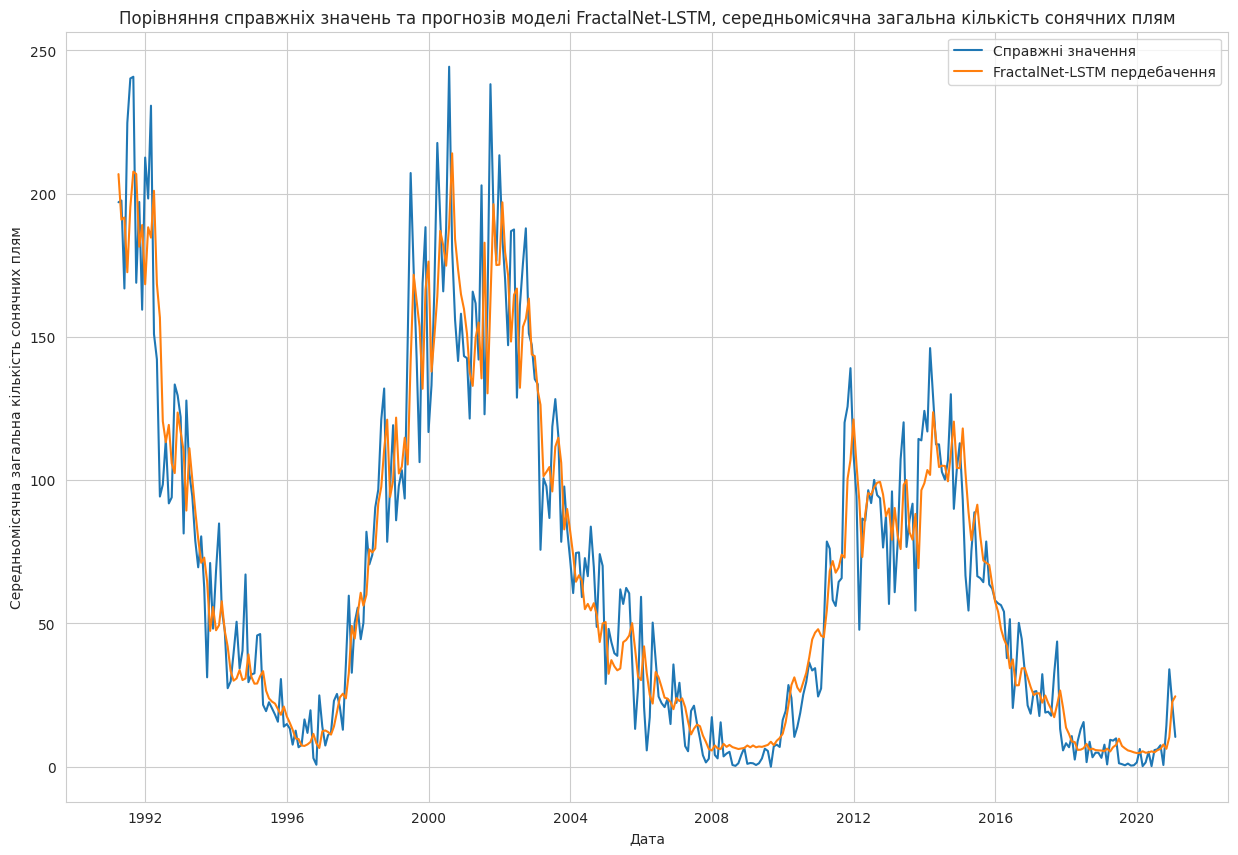

In [72]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))

sns.lineplot(x=df["Date"], y=eval_results["y_true"], label="Справжні значення")
sns.lineplot(x=df["Date"], y=eval_results["fractal"], label="FractalNet-LSTM пердебачення")
plt.title("Порівняння справжніх значень та прогнозів моделі FractalNet-LSTM, середньомісячна загальна кількість сонячних плям")

plt.xlabel("Дата")
plt.ylabel("Середньомісячна загальна кількість сонячних плям")

plt.show()